## Importing libraries and Data

In [213]:
import pandas as pd
import seaborn as sns
from datasist.structdata import detect_outliers
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import pickle

In [205]:
#import train and test datasets
df_train = pd.read_csv("../DataSet/Train.csv")

# Print the DataFrame
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


### Removing ID column and missing values

In [135]:
df_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [136]:
df_test.drop(labels="id",axis=1,inplace=True)

## Handeling duplications and missing Values

In [137]:
#see if there is any missing values
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [138]:
# as the missing values around 3 precent of data so we will remove it
df_train=df_train.dropna(axis=0)

In [139]:
#see if there is any duplication
df_train.duplicated().sum()

0

## handel outliers

In [140]:
# show if there is any outliers
outliers=detect_outliers(df_train,0,df_train.columns)
print(len(outliers))

493


In [141]:
#replacing outliers with median value in each column
for col in df_train:
    outliers = detect_outliers(df_train, 0, [col])
    col_mode = df_train[col].median()
    df_train[col].iloc[outliers] = col_mode


C:\Users\Owner\AppData\Local\Temp\ipykernel_2812\4222408826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col].iloc[outliers] = col_mode


## Show the Data


In [142]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,...,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,1238.270718,0.496233,1.522451,0.510799,4.286288,0.520844,32.074335,0.502009,140.263184,4.516323,...,644.999498,1251.115520,2123.632848,12.307885,5.774485,11.001507,0.832245,0.501758,0.505274,1.499247
std,439.641057,0.500111,0.815499,0.500009,4.308039,0.499691,18.138177,0.288622,35.398777,2.291257,...,442.868011,431.924893,1085.051293,4.213061,4.357385,5.464872,0.373742,0.500123,0.500098,1.118539
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.500000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.500000,875.500000,1207.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1225.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1615.500000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.500000,1633.000000,3065.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [143]:
# show the values in evey column
for col in df_train.columns:
    print(col)
    print(df_train[col].value_counts())
    print("____________________________")

battery_power
618     6
1872    6
1589    6
1949    5
1083    5
       ..
1981    1
863     1
817     1
663     1
858     1
Name: battery_power, Length: 1090, dtype: int64
____________________________
blue
0    1003
1     988
Name: blue, dtype: int64
____________________________
clock_speed
0.5    410
2.8     84
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     64
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.8     58
0.9     57
2.4     57
1.2     56
2.6     55
2.7     54
1.1     50
3.0     28
Name: clock_speed, dtype: int64
____________________________
dual_sim
1    1017
0     974
Name: dual_sim, dtype: int64
____________________________
fc
0.0     469
1.0     241
3.0     188
2.0     186
5.0     137
4.0     130
6.0     108
7.0     100
9.0      78
8.0      77
10.0     60
11.0     51
12.0     44
13.0     40
16.0     23
15.0     23
14.0     20
18.0     10
17.0      5
19.0      1
Name: fc, dtype: int64
________

In [144]:
# split the data into 2 lists numerical and categorical values
list_of_categorical=[]
list_of_numerical=[]
for col in df_train:
    if len(df_train[col].unique())==2:
        list_of_categorical.append(col)
        
    else:
        list_of_numerical.append(col)

<AxesSubplot:>

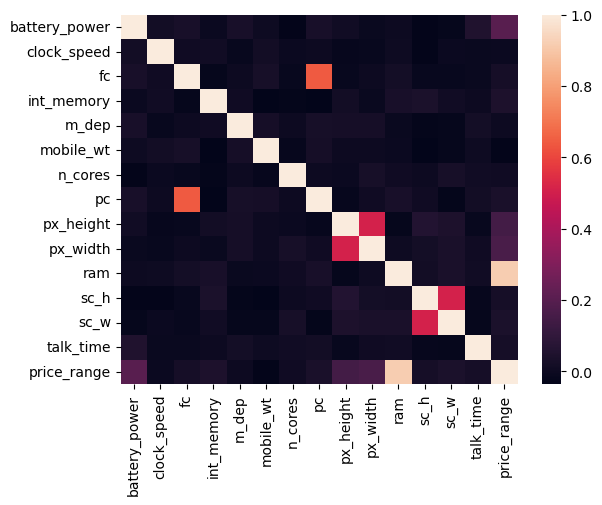

In [145]:
#show correlation 
sns.heatmap(df_train[list_of_numerical].corr())

## splitting features from target

In [147]:
# for train data
X=df_train.drop(labels=['price_range'],axis=1)
y=df_train['price_range']

## Feature selection

For selecting numerical features I used this link as reference "https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/"

Andfor selecting categorical features I used this link as reference "https://machinelearningmastery.com/feature-selection-with-categorical-data/"

### Feature selection for Categorical using chi-squared

In [148]:
k = len(list_of_categorical)//2  # Number of features to select
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X[list_of_categorical], y)

In [149]:
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names_cat = X[list_of_categorical].columns[selected_feature_indices]
print("Selected Features:", list(selected_feature_names_cat)," from : ",list_of_categorical)

Selected Features: ['blue', 'four_g', 'touch_screen']  from :  ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']


### Feature selection for Numerical using ANOVA

In [150]:
k = (len(list_of_numerical)-1)//2 # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X[list_of_numerical[:-1]], y)

In [151]:
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names_num = X[list_of_numerical[:-1]].columns[selected_feature_indices]
print("Selected Features:", list(selected_feature_names_num)," from : ",list_of_numerical)

Selected Features: ['battery_power', 'int_memory', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram']  from :  ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']


In [210]:
selected_features=list(selected_feature_names_num)+list(selected_feature_names_cat)
selected_features

['battery_power',
 'int_memory',
 'mobile_wt',
 'n_cores',
 'px_height',
 'px_width',
 'ram',
 'blue',
 'four_g',
 'touch_screen']

## Scalling features

In [217]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X[selected_features])

In [178]:
# saving standard scaler
joblib.dump(scaler, 'std_scaler_selected.bin', compress=True)

['std_scaler_selected.bin']

## Training Models

### XGBoost

In [218]:
#intializing model
model_XGB = XGBClassifier(objective= 'multi:softprob',
    nthread=4,
    seed=42)

# useing random grid search for best parameter
param_grid_XGB = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.5, 1.0]
}
random_search_XGB = RandomizedSearchCV(estimator=model_XGB,param_distributions=param_grid_XGB, cv=5, scoring = 'accuracy',verbose=10)
random_search_XGB.fit(X_train_scaled, y)
print("Best Parameters: ", random_search_XGB.best_params_)
print("Best Accuracy: ", random_search_XGB.best_score_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9
[CV 1/5; 1/10] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9;, score=0.912 total time=   0.1s
[CV 2/5; 1/10] START colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9
[CV 2/5; 1/10] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9;, score=0.932 total time=   0.1s
[CV 3/5; 1/10] START colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9
[CV 3/5; 1/10] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9;, score=0.927 total time=   0.1s
[CV 4/5; 1/10] START colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9
[CV 4/5; 1/10] END colsample_bytre

[CV 2/5; 7/10] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=7, n_estimators=200, subsample=1.0;, score=0.869 total time=   0.4s
[CV 3/5; 7/10] START colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=7, n_estimators=200, subsample=1.0
[CV 3/5; 7/10] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=7, n_estimators=200, subsample=1.0;, score=0.842 total time=   0.4s
[CV 4/5; 7/10] START colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=7, n_estimators=200, subsample=1.0
[CV 4/5; 7/10] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=7, n_estimators=200, subsample=1.0;, score=0.867 total time=   0.4s
[CV 5/5; 7/10] START colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=7, n_estimators=200, subsample=1.0
[CV 5/5; 7/10] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.001, max_depth=7, n_estimators=200, subsample=1.0;, score=0.854 total time=   0.4s
[CV 1/5; 8/10] START colsample_bytre

### Gradient Boost

In [216]:
# intializing model
gb_model = GradientBoostingClassifier()

# useing random grid search for best parameter
param_grid_GB = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search_GB = RandomizedSearchCV(estimator=gb_model, param_distributions=param_grid_GB, cv=3, scoring='accuracy',verbose=10)

grid_search_GB.fit(X_train_scaled, y)

print("Best Parameters: ", grid_search_GB.best_params_)
print("Best Accuracy: ", grid_search_GB.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=0.8
[CV 1/3; 1/10] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=0.8;, score=0.819 total time=   0.8s
[CV 2/3; 1/10] START learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=0.8
[CV 2/3; 1/10] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=0.8;, score=0.818 total time=   0.7s
[CV 3/3; 1/10] START learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=0.8
[CV 3/3; 1/10] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=0.8;, score=0.808 total time=   0.7s
[CV 1/3; 2/10] START learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples

[CV 3/3; 10/10] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=0.8;, score=0.894 total time=   2.4s
Best Parameters:  {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.2}
Best Accuracy:  0.9126074433480528


## Evaluation 

because there is no target classes in test.csv file i could not evaluate the models 

## Saving best accuracy model

In [207]:
# saving XGBoost model
best_model_XGB.fit(X_train_scaled,y)
pickle.dump(best_model_XGB, open("Xgboost_model.pkl", "wb"))